In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import tensorflow 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [5]:
train_img = np.load('data/k49-train-imgs.npz')['arr_0']
train_label = np.load('data/k49-train-labels.npz')['arr_0']

test_img = np.load('data/k49-test-imgs.npz')['arr_0']
test_label = np.load('data/k49-test-labels.npz')['arr_0']

char_df = pd.read_csv('data/k49_classmap.csv', encoding = 'utf-8')

In [9]:
#set font do display japanese characters
font_path = 'NotoSansJP-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)


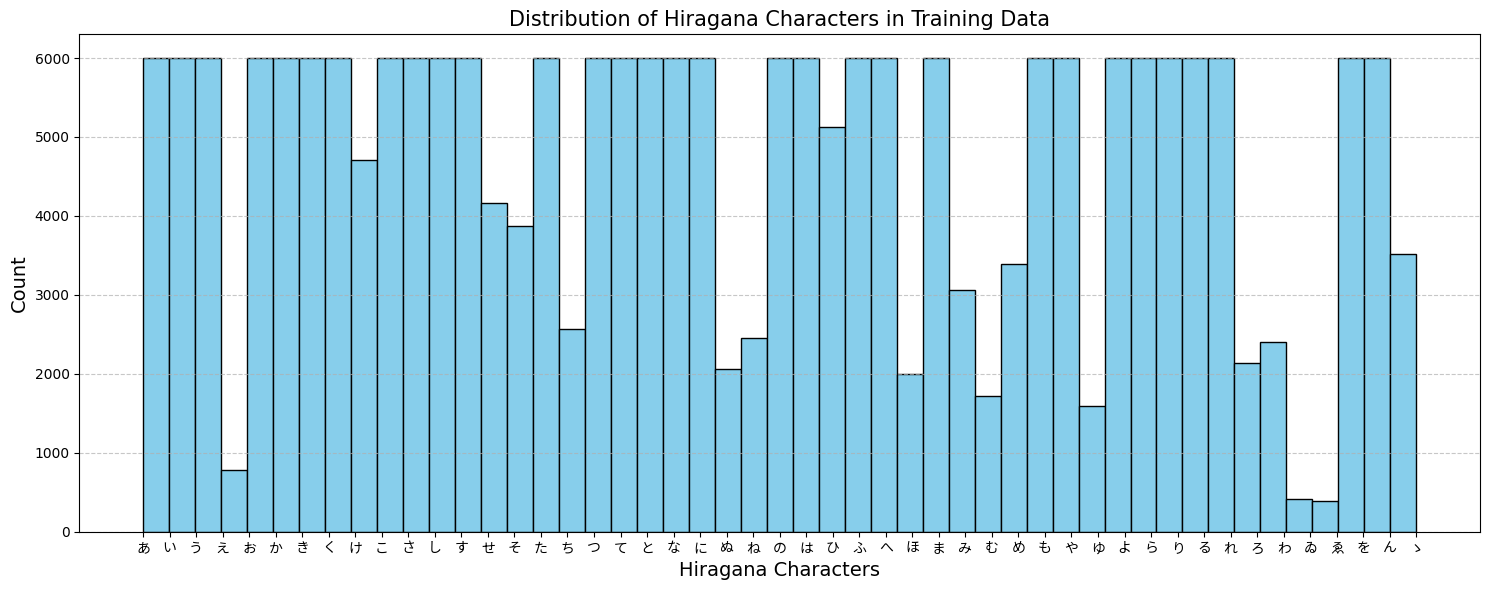

In [10]:
plt.figure(figsize=(15, 6))
plt.hist(train_label, bins=49, color='skyblue', edgecolor='black')

# Label the x-axis with hiragana characters
plt.xticks(char_df['index'], char_df['char'], fontsize=12,fontproperties=font_prop)

# Additional plot enhancements
plt.title('Distribution of Hiragana Characters in Training Data', fontsize=15)
plt.xlabel('Hiragana Characters', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


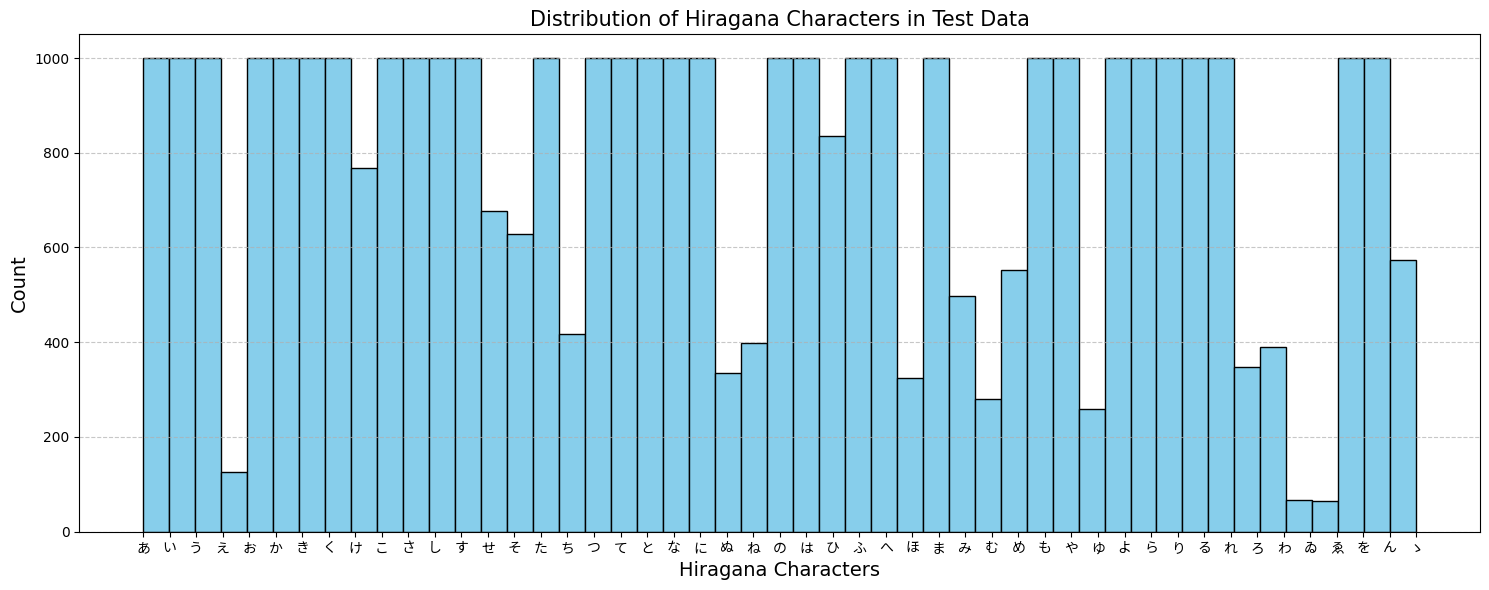

In [18]:
plt.figure(figsize=(15, 6))
plt.hist(test_label, bins=49, color='skyblue', edgecolor='black')

# Label the x-axis with hiragana characters
plt.xticks(char_df['index'], char_df['char'], fontsize=12,fontproperties=font_prop)

# Additional plot enhancements
plt.title('Distribution of Hiragana Characters in Test Data', fontsize=15)
plt.xlabel('Hiragana Characters', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


In [12]:
#Normalise

train_img = train_img / 255.0
test_img = test_img / 255.0


In [13]:
img_rows, img_cols = train_img.shape[1:]

X = np.expand_dims(train_img, axis=-1)
x_test = np.expand_dims(test_img, axis=-1)
y = tensorflow.keras.utils.to_categorical(train_label)
y_test = tensorflow.keras.utils.to_categorical(test_label)


In [14]:
x_train, x_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(img_rows,img_cols,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(49, activation='softmax'))
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2359552   
                                                      

In [20]:
model.fit(x_train,y_train,batch_size=100, epochs=3,verbose=1, validation_data=(x_val,y_val))

Epoch 1/3
1859/1859 [==============================] - 425s 228ms/step - loss: 0.8310 - accuracy: 0.7788 - val_loss: 0.2903 - val_accuracy: 0.9224
Epoch 2/3
1859/1859 [==============================] - 357s 192ms/step - loss: 0.4386 - accuracy: 0.8791 - val_loss: 0.2150 - val_accuracy: 0.9420
Epoch 3/3
1859/1859 [==============================] - 226s 122ms/step - loss: 0.3516 - accuracy: 0.9009 - val_loss: 0.1826 - val_accuracy: 0.9513


In [21]:
results = model.evaluate(x_test, y_test, batch_size=100)
print("test loss, test acc:", results)


386/386 [==============================] - 11s 28ms/step - loss: 0.3827 - accuracy: 0.9003
test loss, test acc: [0.38266435265541077, 0.9002516269683838]
